# Analisis de Posts de Instagram Geo-etiquetados en Valdivia

### La importancia de las RRSS en el turismo

Ya es conocido el impacto que tiene Instagram dentro del turismo de una locación en la actualidad, por esto mismo se analizará los datos sobre las geo-etiquetas más publicadas dentro de las comunas que componen la Región de los Ríos. Los datos se extraerán con el <a href="https://github.com/mhuala/Instagram-locations-scrape">siguiente repositorio de GitHub</a>. <br><br><b>Algunos links sobre el tema:</b> 
    
    
<ul>
<li>
<a href="https://www.researchgate.net/publication/286530462_Beyond_User_Gaze_How_Instagram_Creates_Tourism_Destination_Brand">Beyond User Gaze: How Instagram Creates Tourism Destination Brand? - Articulo de Investigación de Megasari N. Fatanti y Wayan Suyadnya </a></li><br>
<li><a href="https://www.trekksoft.com/en/blog/how-instagram-has-changed-the-tourism-and-travel-industry">How Instagram has changed the tourism and travel industry - Del portal Trekksoft</a></li><br>
<li><a href="https://www.nationalgeographic.com/travel/travel-interests/arts-and-culture/how-instagram-is-changing-travel/">How Instagram Is Changing Travel - De Natioal Geographic</a></li><br></ul>

### Librerías a usar

Se usarán variadas librerías que ayudarán en cada parte del procesamiento de los datos. <ul><li>Carga de los datos.</li><li>Limpieza y refinamiento de los datos.</li><li>Analisis exploratorio de los datos. </li></ul>

<b>Documentación de librerías:</b> 
    
    
1) <a href="https://pandas.pydata.org/docs/user_guide/index.html">Pandas</a><br>
2) <a href="https://numpy.org/doc/">Numpy</a><br>
3) <a href="https://matplotlib.org/3.3.2/contents.html">Matplotlib</a><br>
4) <a href="https://seaborn.pydata.org/tutorial.html">Seaborn</a><br>
5) <a href="https://docs.python.org/3/library/json.html">JSON</a><br>
6) <a href="https://docs.python.org/3/library/calendar.html">Calendar</a><br>
7) <a href="https://docs.python.org/3/library/datetime.html">Datetime</a><br>



In [1]:
import pandas as pd
from numpy.random import randn
import matplotlib.pyplot as plt
import seaborn as sns
import json
import calendar
from datetime import datetime, timedelta

### Carga de datos

Se usarán los siguientes datos (Disponibles en el repositorio):

<ul>    
<li><a href="https://www.bcentral.cl/web/banco-central/areas/estadisticas/imacec">IMACEC historico</a></li>
<li><a href="https://trends.google.es/trends/explore?q=%2Fg%2F122qxpwq">Tendencia en GoogleTrends sobre Valdivia (Ciudad en Chile)</a></li>
<li><a href="https://si3.bcentral.cl/Siete/ES/Siete/Cuadro/CAP_TIPO_CAMBIO/MN_TIPO_CAMBIO4/DOLAR_OBS_ADO">Dolar Observado historico</a></li>
<li><a href="https://www.tutiempo.net/clima/ws-857660.html"> Registro climatico historico </a></li>
<li><a href="https://python-visualization.github.io/folium/quickstart.html">EMAT</a></li>
<li><a href="https://github.com/mhuala/Instagram-Geo-tagged-posts-scraper">Instagram geo-tagged posts de Valdivia obtenidos con este repositorio </a></li>
</ul>

In [2]:
df_imacec = pd.read_csv('../Datos/IMACEC/IMACEC.csv')
df_gt = pd.read_csv('../Datos/Google Trends/Valdivia-GoogleTrends.csv')
df_dolar = pd.read_csv('../Datos/Dolar Historico/Dolar_2014-2020.csv')
df_clima = pd.read_json('../Datos/Clima/Valdivia_weather.json')
df_emat = pd.read_csv('../Datos/Encuesta Mensual de Alojamiento Turistico (EMAT)/emat_los_rios.csv')
df_ig = pd.read_csv('../Datos/Posts/valdivia_posts.csv')

### IMACEC

Para limpiar estos datos se debe usar la función <code>apply()</code> y dentro de esta utilizar las funciones <code>datetime.strptime()</code> y <code>strftime()</code> de esta manera se convierten las fechas que por defecto tienen el siguiente formato <b>DD/MM/YYYY</b> a uno de la forma <b>YYYY-MM-DD</b> que sea psoible trabajar con los metodos que posee un dato de tipo <i>datetime</i><br><br> Finalmente se seleccionan todos los datos a partir del año 2014.



In [3]:
df_imacec["date"]= df_imacec.date.apply(lambda row: datetime.strptime(row, "%d/%m/%Y").strftime("%Y-%m-%d"))
df_imacec["date"]= pd.to_datetime(df_imacec.date)
df_imacec = df_imacec.loc[df_imacec['date'] >= '2014']
df_imacec

,date,imacec
12,2014-01-31,97.6
13,2014-02-28,93.5
14,2014-03-31,106.5
15,2014-04-30,103.8
16,2014-05-31,103.3
...,...,...
87,2020-04-30,98.9
88,2020-05-31,97.7
89,2020-06-30,96.8
90,2020-07-31,96.4


### Google Trends

Para limpiar estos datos se debe usar la función <code>to_datetime()</code> , debido a que este dataframe no posee los días y por defecto la función anterior retornará la fecha en el primer día de cada mes. Para arreglar esto y sumar a la fecha los días correspondientes en cada mes para que cada fecha quede en el ultimo día de su respectivo mes se puede hacer lo siguiente:<br>
    <ul><li>Utilizar el metodo <code>apply()</code> y dentro de el realizar la suma de las fechas por fila</li><li>Utilizar el metodo <code>calendar.monthrange()</code> para encontrar el último día de cada mes y además <code>timedelta()</code> para ir sumando esa cantidad de días a la fila actual.</li><li>Se cambian los nombres de las columnas para facilitar su manejo.</li></ul><br>Finalmente se seleccionan las fechas mayores al año 2014.

In [4]:
df_gt["Mes"]= pd.to_datetime(df_gt.Mes)
df_gt["Mes"]= df_gt.Mes.apply(lambda row: row + timedelta(days=int(calendar.monthrange(row.year, row.month)[1])-1))
df_gt.rename(columns={'Mes':'date','Valdivia: (Todo el mundo)':'google_trends'} , inplace=True)
df_gt = df_gt.loc[df_gt['date'] >= '2014']
df_gt

,date,google_trends
120,2014-01-31,53
121,2014-02-28,54
122,2014-03-31,37
123,2014-04-30,32
124,2014-05-31,34
...,...,...
197,2020-06-30,50
198,2020-07-31,58
199,2020-08-31,67
200,2020-09-30,67


### Dolar Historico

Para limpiar estos datos se debe usar la función <code>to_datetime()</code> , para convertir la columna de <i>string</i> a <i>datetime</i><br><ul><li>Se utiliza el metodo <code>resample()</code> en conjunto al metodo <code>mean()</code> de esta forma se obtiene el promedio del dolar en cada mes</li><li>Utilizar el metodo <code>calendar.monthrange()</code> para encontrar el último día de cada mes y además <code>timedelta()</code> para ir sumando esa cantidad de días a la fila actual.</li></ul>Finalmente se crea un nuevo dataframe con la serie obtenida con el metodo anterior.

In [5]:
df_dolar["date"]= pd.to_datetime(df_dolar.date)
sf_dolar = df_dolar.resample('M', on='date')['value'].mean()
df_usd = pd.DataFrame({'date':sf_dolar.index, 'total':sf_dolar.values})
df_usd

,date,total
0,2014-01-31,551.480000
1,2014-02-28,558.932143
2,2014-03-31,565.341935
3,2014-04-30,561.550000
4,2014-05-31,558.187097
...,...,...
79,2020-08-31,803.128571
80,2020-09-30,803.085714
81,2020-10-31,803.400000
82,2020-11-30,803.171429


### Clima historico

Para limpiar estos datos se debe usar la función <code>to_datetime()</code> , para convertir la columna de <i>string</i> a <i>datetime</i><br><ul><li>Se utliza el metodo <code>resample()</code> en conjunto al metodo <code>mean()</code> de esta forma se obtiene el promedio del dolar en cada mes</li><li>Se utiliza el metodo <code>calendar.monthrange()</code> para encontrar el último día de cada mes y además <code>timedelta()</code> para ir sumando esa cantidad de días a la fila actual.</li></ul>Finalmente este dataframe posee las siguientes variables :<ul><li><b>TP</b> : Temperatura promedio</li><li><b>TMAX</b> : Temperatura Maxima</li><li><b>TMIN</b> : Temperatura Minima</li><li><b>P_ATM</b>: Presión Atmosferica</li><li><b>HUM</b>: Humedad</li><li><b>PP</b>: Precipitaciones</li><li><b>VISI</b> : Visibilidad</li><li><b>VV</b> : Velocidad Viento</li></ul>

In [6]:
df_clima["date"]= df_clima.date.apply(lambda row: row + timedelta(days=int(calendar.monthrange(row.year, row.month)[1])-1))
df_clima

,date,TP,TMAX,TMIN,P_ATM,HUM,PP,VISI,VV,VMAXV
0,2014-01-31,19.5,23.6,8.6,1016.6,63.0,79.50,14.7,11.4,20.3
1,2014-02-28,18.9,23.7,8.3,1016.2,66.4,28.46,13.8,11.1,20.2
2,2014-03-31,15.7,19.9,6.4,1017.8,74.8,112.25,11.0,10.4,18.5
3,2014-04-30,12.7,16.9,6.5,1020.2,84.7,38.60,8.4,7.3,14.2
4,2014-05-31,11.6,13.8,8.5,1020.9,90.5,43.93,8.2,10.2,18.9
...,...,...,...,...,...,...,...,...,...,...
76,2020-05-31,9.6,15.4,6.2,1019.6,95.9,134.35,6.8,6.0,14.4
77,2020-06-30,8.0,12.3,5.2,1014.9,94.2,406.90,8.1,9.7,20.3
78,2020-07-31,7.0,11.4,4.1,1017.8,94.9,322.31,7.3,8.2,17.1
79,2020-08-31,7.0,12.8,2.6,1020.7,90.5,138.67,8.1,7.4,16.5


### EMAT (Encuesta Mensual Alojamiento y Turismo)

Para limpiar estos datos se usa la función <code>to_datetime()</code>, para convertir la columna de <i>string</i> a <i>datetime</i><br><ul><li>Se utiliza el metodo <code>resample()</code> en conjunto al metodo <code>mean()</code> de esta forma se obtiene el promedio del dolar en cada mes</li><li>Se utiliza el metodo <code>calendar.monthrange()</code> para encontrar el último día de cada mes y además <code>timedelta()</code> para ir sumando esa cantidad de días a la fila actual.</li></ul>Finalmente este dataframe posee las siguientes variables :<ul><li><b>LL_CH</b> : Llegadas de chilenos a la Región de los Ríos</li><li><b>LL_EXT</b> : Llegadas de extranjeros a la Región de los Ríos</li><li><b>LL_TOT</b>: Llegadas totales a la Región de los Ríos</li><li><b>PER_CH</b>: Pernoctaciones de chilenos en la Región de los Ríos</li><li><b>PER_EXT</b>Pernoctaciones de extranjeros en la Región de los Ríos</li><li><b>PER_TOT</b>: Pernoctaciones totales en la Región de los Ríos</li></ul>

In [7]:
df_emat["date"]= df_emat.date.apply(lambda row: datetime.strptime(row, "%d/%m/%Y").strftime("%Y-%m-%d"))
df_emat["date"]= pd.to_datetime(df_emat.date)
df_emat["date"]= df_emat.date.apply(lambda row: row + timedelta(days=int(calendar.monthrange(row.year, row.month)[1])-1))
df_emat = df_emat.loc[df_emat['date'] >= '2014']
df_emat.head()

,date,LL_CH,LL_EXT,LL_TOT,PER_CH,PER_EXT,PER_TOT
48,2014-01-31,22035,4180,26215,37890,7954,45844
49,2014-02-28,30336,3050,33386,55354,5129,60483
50,2014-03-31,13826,2396,16222,23432,4091,27523
51,2014-04-30,11665,1473,13138,20424,2621,23045
52,2014-05-31,9273,1098,10371,16426,1971,18397


### Instagram

Este dataframe viene listo en formato, las variables son las siguientes:
    <ul><li><b>user_id</b> : ID unica de usuario de Instagram.</li><li><b>date</b> : Fecha de publicación.</li><li><b>shortcode</b> : Identificador unico de publicación.</li><li><b>post_text</b>: Texto que acompaña a la publicación</li><li><b>post_reactions</b>: Cantidad de Likes de la publicación.</li><li><b>post_is_video</b>: Booleano que es <i>True</i> en caso de que la publicación sea un video, en vez de una foto.</li></ul>Se irá trabajando de a poco este dataframe con tal de ir recabando información.

In [8]:
df_ig.head()

,user_id,date,shortcode,post_text,post_reactions,post_is_video
0,13076110,2020-09-20 21:53:36,CFYRGMiMz--,#moon,17,False
1,18031996732,2020-09-20 21:53:19,CFYREGrsXxS,🇨🇱Torta de alfajor entregada a mis clientes de...,2,False
2,3113703295,2020-09-20 21:52:43,CFYQ_sisY9X,NaN,1,False
3,56182017,2020-09-20 21:51:36,CFYQ3dsskvg,Celebrando los 9 de Gus con una vuelta en Kaya...,39,False
4,1641412099,2020-09-20 21:48:50,CFYQcUrgyoW,A los mandriles les di la luz 🚦,24,True


Debido a la gran cantidad de datos se puede verificar que no hayan nulos ni repetidos usando el metodo <code>describe(include='all')</code>, la idea es tener registros unicos evitando algún tipo de sesgo que se pueda generar por tener datos repetidos o nulos.

In [9]:
df_ig.describe(include='all')

,user_id,date,shortcode,post_text,post_reactions,post_is_video
count,4.820920e+05,482092,482092,443330,482092.000000,482092
unique,NaN,426811,428185,367254,NaN,2
top,NaN,2020-09-20 21:09:47,CFYDN6BsUNr,😍,NaN,False
freq,NaN,10,5,381,NaN,451441
mean,7.591320e+09,NaN,NaN,NaN,57.768579,NaN
std,1.038765e+10,NaN,NaN,NaN,515.183525,NaN
min,3.638000e+03,NaN,NaN,NaN,0.000000,NaN
25%,8.828580e+08,NaN,NaN,NaN,9.000000,NaN
50%,3.483353e+09,NaN,NaN,NaN,21.000000,NaN
75%,8.544187e+09,NaN,NaN,NaN,46.000000,NaN


El identificador unico de cada publicación es el <b>shortcode</b> y se puede observar que del total no todos son unicos, se debe eliminar los duplicados para esto se utiliza el metodo <code>drop_duplicates(subset = ['shortcode'])</code>. Finalmente se verifica con <code>describe(include='all')</code>.

In [10]:
df_ig = df_ig.drop_duplicates(subset = ['shortcode'])
df_ig.describe(include='all')

,user_id,date,shortcode,post_text,post_reactions,post_is_video
count,4.281850e+05,428185,428185,393940,428185.000000,428185
unique,NaN,426811,428185,367221,NaN,2
top,NaN,2020-01-20 21:45:17,Bf8i81XFhYp,😍,NaN,False
freq,NaN,4,1,348,NaN,400752
mean,6.886069e+09,NaN,NaN,NaN,58.572437,NaN
std,9.490690e+09,NaN,NaN,NaN,521.342292,NaN
min,3.638000e+03,NaN,NaN,NaN,0.000000,NaN
25%,8.039580e+08,NaN,NaN,NaN,9.000000,NaN
50%,3.230406e+09,NaN,NaN,NaN,21.000000,NaN
75%,8.185193e+09,NaN,NaN,NaN,47.000000,NaN


Se crea una columna de valores "1", esto  permite realizar la suma por fecha posteriormente. También a partir de la columna de booleanos <i>post_is_video</i> se crean nuevas columnas de variables dummies con <code>get_dummies(df_ig["post_is_video"])</code> que valdrán 1 ó 0 dependiendo si son o no videos.

In [11]:
df_ig["post_count"] = 1
dummy = pd.get_dummies(df_ig["post_is_video"])
dummy.head()

,False,True
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


Se unen estas nuevas columnas al dataframe original de posts de Instagram (df_if) con el metodo <code>merge()</code>. Finalmente se cambian los nombres de estas columnas por otros más descriptivos con <code>rename()</code>.

In [12]:
df_ig = df_ig.merge(dummy, left_index=True , right_index=True)
df_ig.rename(columns={False:'photo',True:'video'}, inplace=True)
df_ig.head()

,user_id,date,shortcode,post_text,post_reactions,post_is_video,post_count,photo,video
0,13076110,2020-09-20 21:53:36,CFYRGMiMz--,#moon,17,False,1,1,0
1,18031996732,2020-09-20 21:53:19,CFYREGrsXxS,🇨🇱Torta de alfajor entregada a mis clientes de...,2,False,1,1,0
2,3113703295,2020-09-20 21:52:43,CFYQ_sisY9X,NaN,1,False,1,1,0
3,56182017,2020-09-20 21:51:36,CFYQ3dsskvg,Celebrando los 9 de Gus con una vuelta en Kaya...,39,False,1,1,0
4,1641412099,2020-09-20 21:48:50,CFYQcUrgyoW,A los mandriles les di la luz 🚦,24,True,1,0,1


Para poder sumar por fecha la cantidad de posts, posts que son fotos y posts que son videos se puede usar la función <code>resample()</code> en conjunto con el metodo <code>sum()</code> sobre la columna <i>post_count</i>. Este valor se guarda en una variable que luego se puede plotear en una serie de tiempo

In [13]:
df_ig["date"] = pd.to_datetime(df_ig["date"])

In [14]:
posts_sum = df_ig.resample('M', on='date')['post_count'].sum()
posts_sum

date
2011-10-31        3
2011-11-30        0
2011-12-31        0
2012-01-31        1
2012-02-29        0
              ...  
2020-05-31     8599
2020-06-30     9466
2020-07-31    20287
2020-08-31    20892
2020-09-30    16744
Freq: M, Name: post_count, Length: 108, dtype: int64

In [15]:
time_serie = pd.DataFrame(data=posts_sum)
time_serie = time_serie.reset_index()

Para poder crear un nuevo dataframe que tenga por columna los meses, por indices los años y por valores la cantidad de publicaciónes en cada mes de cada año , se crea una función llamada<code>mont_post_recorder()</code> la cual retornará una lista que contiene los valores de todos los años para el mismo mes.

In [16]:
def month_post_recorder(month):
    my_list = []
    time_serie.loc[(time_serie['date'].dt.month==month)]['post_count'].apply(lambda row: my_list.append(row))
    return my_list

Se crea nuevo dataframe con los valores para cada mes, finalmente se deja la columna <i>Years</i> como Indice.

In [17]:
years_list = [2012,2013,2014,2015,2016,2017,2018,2019,2020]
jan = month_post_recorder(1)
feb = month_post_recorder(2)
mar = month_post_recorder(3)
apr = month_post_recorder(4)
may = month_post_recorder(5)
jun = month_post_recorder(6)
jul = month_post_recorder(7)
aug = month_post_recorder(8)
sep = month_post_recorder(9)
oct = month_post_recorder(10)
nov = month_post_recorder(11)
dec = month_post_recorder(12)

d = {'Year': years_list , 
     'Jan': jan ,
     'Feb': feb ,
     'Mar': mar ,
     'Apr': apr ,
     'May': may ,
     'Jun': jan ,
     'Jul': jul ,
     'Aug': aug ,
     'Sep': sep ,
     'Oct': oct ,
     'Nov': nov ,
     'Dec': dec }

post_per_month = pd.DataFrame(data=d)
post_per_month = post_per_month.set_index('Year')
post_per_month

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2012,1,0,1,2,3,1,1,4,6,3,0,0
2013,19,24,13,8,11,19,31,15,20,7,17,16
2014,32,54,39,21,48,32,64,54,88,15,17,24
2015,135,256,163,102,128,135,102,173,246,87,60,81
2016,535,514,561,678,1281,535,1639,1616,1667,601,496,453
2017,2498,3606,4250,4096,3863,2498,4301,4394,4890,1198,1046,1845
2018,6218,9616,7731,7671,5064,6218,9385,9644,10500,5794,5163,5544
2019,10932,13950,11108,10889,11450,10932,13004,9914,7890,12198,12114,11685
2020,11190,9976,8394,7946,8599,11190,20287,20892,16744,11750,11229,11479


Con la librería <b>Seaborn</b> se puede grafucar la serie de tiempo que muestra las publicaciones que tienen geo-etiquetado a Valdivia que se emiten por mes y también el gráfico que muestra como han incremententado por mes las publicaciones a lo largo de los años.

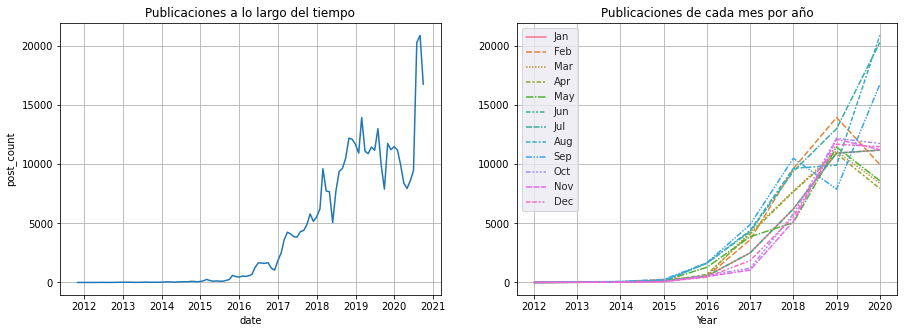

In [18]:
fig,axes=plt.subplots(1,2, figsize=(15, 5))

with sns.axes_style("darkgrid"):
    sns.lineplot(data=post_per_month,ax=axes[1])
    axes[1].set_title('Publicaciones de cada mes por año')
    axes[1].grid(True)
    sns.lineplot(data=time_serie, x="date", y="post_count", ax=axes[0])
    axes[0].set_title('Publicaciones a lo largo del tiempo')
    axes[0].grid(True)
    

Con el fin de tratar de inferir quienes de las personas que publican son turistas que visitan la Región, se propone la siguiente solución. <br><br> Al fin de estimar el rango de tiempo que está un turista extranjero en Chile se indaga en los datos otorgados por la Subsecretaría de Turismo en la planilla llamada <a href="http://www.subturismo.gob.cl/documentos/estadisticas/">Gasto, Permanencia Promedio e Ingreso de Divisas de los turistas extranjeros que visitan Chile. Serie 2001-2016</a> y vemos que no pasa más allá de 14 días como promedio máximo a lo largo de los años . <br><br> Para obtener este dato de los turistas nacionales se puede ver en <a href="https://www.sernatur.cl/gobierno-revela-inedito-estudio-con-el-perfil-de-los-turistas-nacionales/">Perfil de turistas nacionales de Sernatur</a> que muestra un promedio para viajes largos (dónde uno de los destinos se especifica a Valdivia y Corral) es de 9.7 días.<br><br> Teniendo estos datos se puede generalizar y decir que el criterio que se usará para saber si cada publicación es hecha por un turista (sea extranjero o nacional) es que : <b>Haya un lapso maximo de 14 días entre la primera y última publicación de este usuario con esta geo-etiqueta</b><br><br> Esto entendiendo la lógica de inmediatez de Instagram además de que probablemente nadie salga de vacaciones y espere más de 14 días para publicar sus fotos, finalmente de esta forma evitamos cuentas pertenecientes a tiendas o emprendimientos que pudieran estar Spammeando publicaciones con esta geo-etiqueta.

Se agrupan a los usuarios por sus fechas con el criterio de fecha minima (la fecha mas antigua) y fecha máxima (fecha mas reciente)con <code>groupby('user_id')['date']</code> y aplicando este criterio posteriormente con <code>agg(['min','max'])</code>. Finalmente se cambia el nombre de las columnas generadas por este agrupamiento para que sean mas descriptivas.

In [19]:
first_and_last = df_ig.groupby('user_id')['date'].agg(['min','max']).rename(columns={'min':'first','max':'last'})
first_and_last


,first,last
user_id,,
3638,2018-02-12 19:44:14,2018-02-13 12:43:21
6740,2015-02-23 21:05:02,2015-02-23 21:05:02
28917,2017-01-23 20:37:24,2018-04-07 14:44:21
32969,2018-04-30 09:11:24,2018-04-30 09:11:24
34669,2014-05-23 23:25:20,2020-04-08 08:44:47
...,...,...
42768842698,2020-09-27 23:13:22,2020-09-27 23:13:22
42783845741,2020-09-27 18:55:31,2020-09-29 10:01:19
42792854937,2020-09-28 01:34:58,2020-09-28 01:34:58


Se restan ambas fechas y así se obtiene el numero de días que hay entre la primera y última publicación, recordando que esto ibamos a usar cómo criterio para definir quién era turista y quién no.

In [20]:
first_and_last["diff_days"] = (first_and_last['last'] - first_and_last['first']).dt.days

In [21]:
first_and_last.head()

,first,last,diff_days
user_id,,,
3638,2018-02-12 19:44:14,2018-02-13 12:43:21,0
6740,2015-02-23 21:05:02,2015-02-23 21:05:02,0
28917,2017-01-23 20:37:24,2018-04-07 14:44:21,438
32969,2018-04-30 09:11:24,2018-04-30 09:11:24,0
34669,2014-05-23 23:25:20,2020-04-08 08:44:47,2146


Usando la librería <b>Seaborn</b> se puede ver como se distribuyen los días de diferencia entre la primera y ultima publicación para los distintos usuarios.

c:\users\manue\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\manue\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\users\manue\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  war

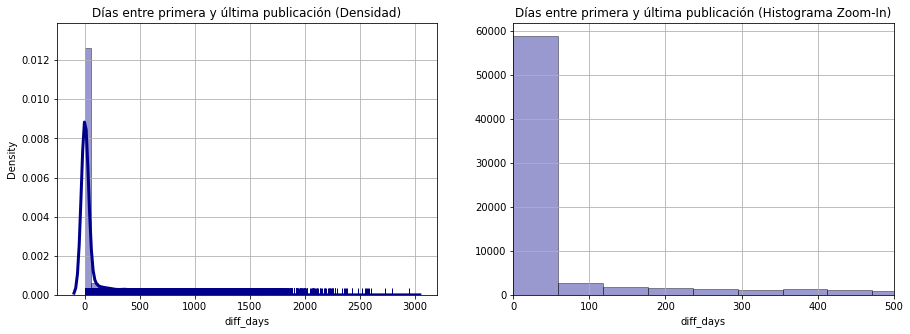

In [22]:
fig,axes=plt.subplots(1,2, figsize=(15, 5))


#Grafico 1
sns.distplot(first_and_last['diff_days'],
             kde = True,
             rug=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3},
             ax=axes[0])

axes[0].set_title('Días entre primera y última publicación (Densidad)')
axes[0].grid(True)


#Grafico 2
sns.distplot(first_and_last['diff_days'], hist=True, kde=False, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3},
             bins=50,
             ax = axes[1])
plt.grid(True)
plt.xlim(0, 500)


axes[1].set_title('Días entre primera y última publicación (Histograma Zoom-In)')
axes[1].grid(True)
plt.xlim(0, 500)
plt.show()

Se puede ver el promedio de publicaciones por personas, dividiendo el total de registros unicos del primer <b>df_ig</b> luego de eliminar los duplicados , con el de cualquier columna del dataframe <b>first_and_last</b> (que representa la cantidad de usuarios unicos que hay entre todas las publicaciones), finalmente se divide 1 en ese cociente.

In [23]:
r_1 =len(first_and_last.index)/ len(df_ig["user_id"])
prom = 1/r_1
print('Cada usuario que geo-etiquetó a Valdivia generó en promedio : '+str(prom)+' publicaciones')

Cada usuario que geo-etiquetó a Valdivia generó en promedio : 5.423221116092915 publicaciones


Ahora que se tiene un dataframe con la diferencia de días que tiene cada usuario entre su primera y ultima publicación, se puede crear una mascara (mask) que permita "filtrar" y solo queden los usuarios que tienen una diferencía de días entre su primera y ultima publicaicón <b>menor o igual a 14 días</b> que fue lo planteado anteriormente.

In [24]:
mask = (first_and_last['diff_days'] <= 14)
first_and_last_tourist = first_and_last[mask]
first_and_last_tourist.shape

(54830, 3)

In [25]:
r_2 = first_and_last_tourist.shape[0]/len(first_and_last.index)*100
print('La cantidad de usuarios calificados como turistas son un : '+str(r_2)+'% del total analizado')

La cantidad de usuarios calificados como turistas son un : 69.44549991134078% del total analizado


Ahora que se tiene un dataframe solo con usuarios que cumplen este requisito de <i>Turismo</i> se procede a crear una columna con un 1, para representar que hay 1 turista en cada registro y luego agruparlos por mes (tal como se ha trabajado todos los otros dataframes) finalmente sumandolos


In [26]:
first_and_last_tourist['post_count']=1

<ipython-input-26-f70438a67fbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_and_last_tourist['post_count']=1


In [27]:
sf = first_and_last_tourist.resample('M', on='first')['post_count'].sum()

In [28]:
time_serie_tourists = pd.DataFrame({'date':sf.index, 'total':sf.values})

In [29]:
time_serie_tourists

,date,total
0,2011-10-31,2
1,2011-11-30,0
2,2011-12-31,0
3,2012-01-31,1
4,2012-02-29,0
...,...,...
103,2020-05-31,619
104,2020-06-30,591
105,2020-07-31,1002
106,2020-08-31,959


Se puede ver como al aplicar este <b>filtro</b> el comportamiento de la serie de tiempo cambia drasticamente y toma un caracter mas estacionario , como la actividad turistica.

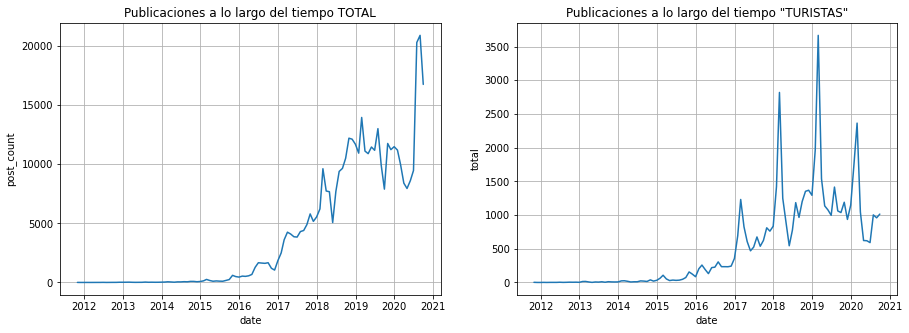

In [30]:
fig,axes=plt.subplots(1,2, figsize=(15, 5))

with sns.axes_style("darkgrid"):
    sns.lineplot(data=time_serie_tourists, x="date",y="total",ax=axes[1])
    axes[1].set_title('Publicaciones a lo largo del tiempo "TURISTAS"')
    axes[1].grid(True)
    sns.lineplot(data=time_serie, x="date", y="post_count", ax=axes[0])
    axes[0].set_title('Publicaciones a lo largo del tiempo TOTAL')
    axes[0].grid(True)

Ahora ya teniendo todos los datos limpios y en un mismo formato de fechas, se puede crear un dataframe final el cual contendrá la información de todos los dataframes cargados inicialmente además de la información sobre las publicaciones a lo largo del tiempo con el filtro de <b>los 14 días para Turistas</b>. <br><br>Primero se crea una función llamada<code>cut_dates()</code> que permitirá obtener los datos comprendidos entre 2014 y 2020 de cada dataframe inicial.<br><br> Posteriormente se aplica la función a los dataframes iniciales, para finalmente utilizando <code>merge()</code> poder unirlos usando como unión la fila de las fechas creando un dataframe final sobre el cual se trabajará.

In [31]:
def cut_dates(df):
    df =df.loc[df['date']>='2014']
    df =df.loc[df['date']<'2020']
    return df 

In [32]:
df_imacec = cut_dates(df_imacec)
time_serie_tourists = cut_dates(time_serie_tourists)
df_usd = cut_dates(df_usd)
df_gt = cut_dates(df_gt)
df_emat = cut_dates(df_emat)
df_clima = cut_dates(df_clima)
df_list = [df_imacec,time_serie_tourists,df_usd,df_gt,df_emat,df_clima]

In [33]:
final = pd.merge(df_imacec, time_serie_tourists, how='outer', on='date')
final = pd.merge(final, df_usd, how='outer', on='date')
final = pd.merge(final, df_gt, how='outer', on='date')
final = pd.merge(final, df_emat, how='outer', on='date')
final = pd.merge(final, df_clima, how='outer', on='date')
final.rename(columns={'total_x':'tourists_posts','total_y':'dolar_price'} , inplace=True)
final

,date,imacec,tourists_posts,dolar_price,google_trends,LL_CH,LL_EXT,LL_TOT,PER_CH,PER_EXT,PER_TOT,TP,TMAX,TMIN,P_ATM,HUM,PP,VISI,VV,VMAXV
0,2014-01-31,97.6,23,551.480000,53,22035,4180,26215,37890,7954,45844,19.5,23.6,8.6,1016.6,63.0,79.50,14.7,11.4,20.3
1,2014-02-28,93.5,25,558.932143,54,30336,3050,33386,55354,5129,60483,18.9,23.7,8.3,1016.2,66.4,28.46,13.8,11.1,20.2
2,2014-03-31,106.5,17,565.341935,37,13826,2396,16222,23432,4091,27523,15.7,19.9,6.4,1017.8,74.8,112.25,11.0,10.4,18.5
3,2014-04-30,103.8,7,561.550000,32,11665,1473,13138,20424,2621,23045,12.7,16.9,6.5,1020.2,84.7,38.60,8.4,7.3,14.2
4,2014-05-31,103.3,10,558.187097,34,9273,1098,10371,16426,1971,18397,11.6,13.8,8.5,1020.9,90.5,43.93,8.2,10.2,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2019-08-31,114.6,1061,708.354839,64,25955,1239,27194,44367,2781,47148,7.2,13.0,3.0,1021.6,91.8,94.46,7.1,6.9,16.5
68,2019-09-30,109.0,1037,710.030000,67,27469,1563,29032,58212,3490,61702,8.3,16.0,2.4,1020.7,82.4,44.70,9.2,7.1,17.7
69,2019-10-31,110.5,1190,712.090323,67,22693,1999,24692,52423,3842,56265,9.6,17.5,3.6,1019.3,80.2,59.68,9.0,7.7,18.4
70,2019-11-30,114.5,935,757.540000,61,22859,1817,24676,44746,3423,48170,13.2,21.2,6.4,1017.6,78.5,34.04,9.3,8.7,20.2


Se pueden ver las correlaciones de los datos, la idea es probar la existencia de una correlación entre los datos de la <b>EMAT: Encuesta Mensual de Alojamiento Túristico</b> con la cantidad de publicaciones generadas en Instagram sobre un lugar y las tendencias de busqueda en Google. 

<AxesSubplot:>

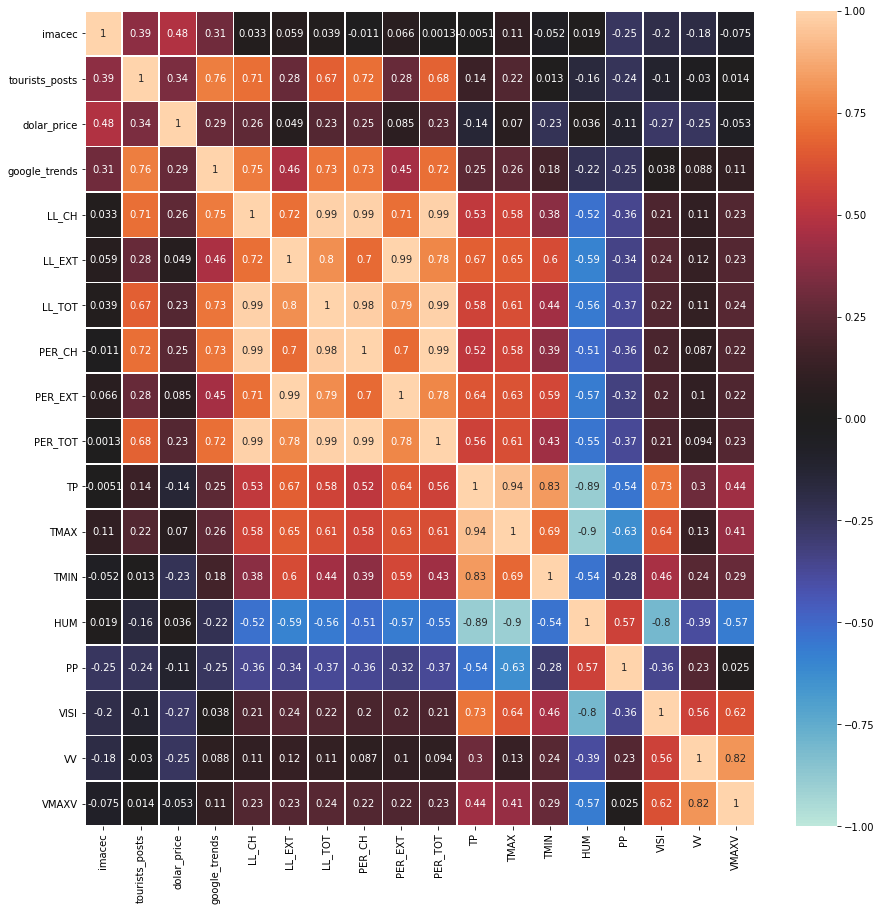

In [34]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(final.corr(), annot = True, vmin=-1, vmax=1, center= 0,linewidths=.5, ax=ax)

Se pueden ver las correlaciones de las variables de llegadas totales (LL_TOT) y pernoctaciones totales (PER_TOT) presentes en la <b>EMAT</b> con otras variables como : <br> <ul><li><b>LL_TOT:</b> TMAX =0.61 , TP = 0.58, google_trends= 0.73, tourists_posts= 0.67</li><li><b>PER_TOT:</b>TMAX =0.61 , TP = 0.56, google_trends= 0.72, tourists_posts= 0.68</li></ul>